#### 1. Implement logistic regression using Python to perform classification on  Social_Network_Ads.csv dataset.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df = pd.read_csv('Workshop_DataScience/Social_Network_Ads.csv')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

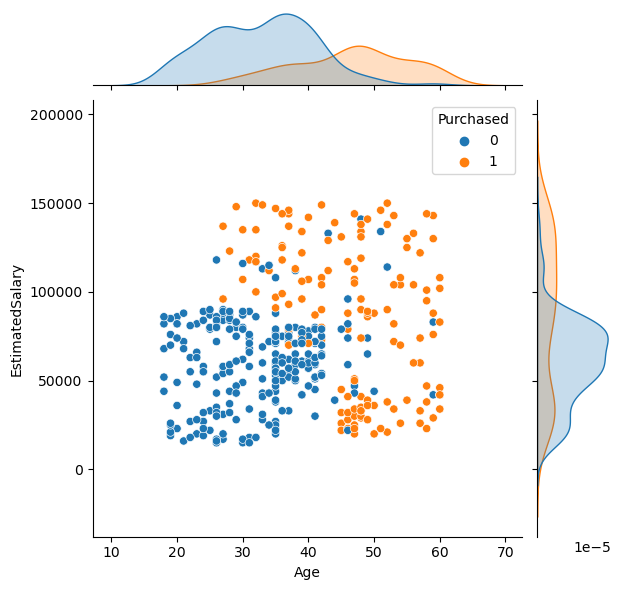

In [ ]:
sns.jointplot(x='Age',
              y='EstimatedSalary',data=df, hue='Purchased')

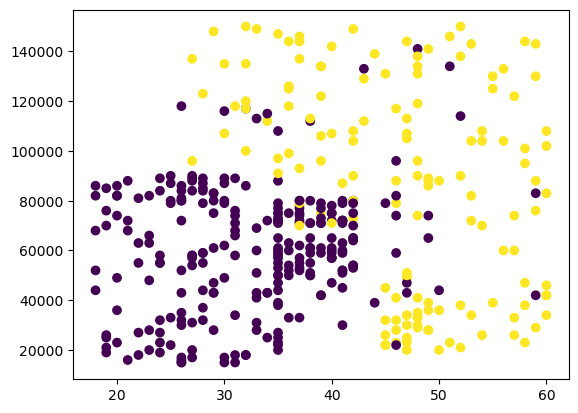

In [ ]:
plt.scatter(df['Age'], df['EstimatedSalary'],c=df['Purchased'])

In [ ]:
# input data
x = df[['Age','EstimatedSalary']]

# output data
y = df['Purchased']

In [ ]:
set(y)

{0, 1}

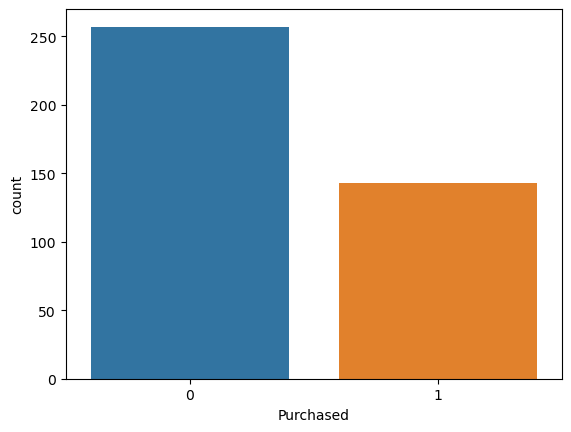

In [ ]:
sns.countplot(x=y);

In [ ]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled.shape

(400, 2)

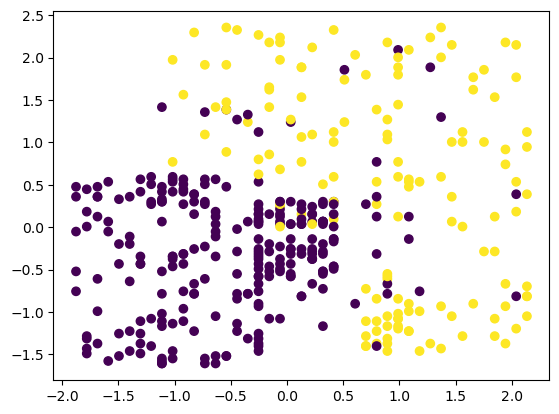

In [ ]:
plt.scatter(x_scaled[:,0],x_scaled[:,1], c=df['Purchased'])

In [ ]:
pd.DataFrame(x_scaled).describe()

,0,1
count,4.000000e+02,4.000000e+02
mean,-2.331468e-16,-1.193490e-17
std,1.001252e+00,1.001252e+00
min,-1.877311e+00,-1.607506e+00
25%,-7.550313e-01,-7.852897e-01
50%,-6.256110e-02,7.561451e-03
75%,7.970571e-01,5.361289e-01
max,2.134241e+00,2.356750e+00


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state=0, test_size=0.25)

In [ ]:
x_train.shape

(300, 2)

In [ ]:
x_test.shape

(100, 2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_test.value_counts()

0    68
1    32
Name: Purchased, dtype: int64

In [ ]:
# Prediction on test data
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [ ]:
result = pd.DataFrame({
    'actual values': y_test,
    'predicted values': y_pred
})

In [ ]:
sum(y_test == y_pred)

89

### 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on  the given dataset.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

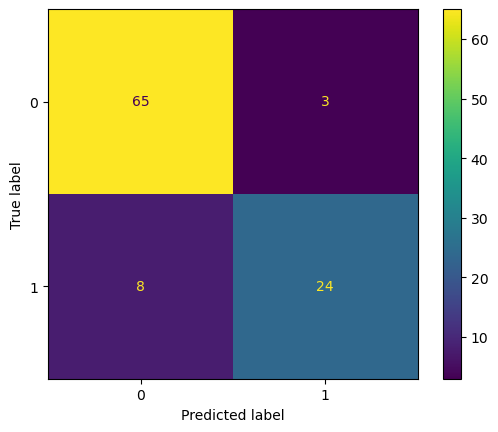

In [ ]:
ConfusionMatrixDisplay(cm).plot()

In [ ]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [ ]:
tp = cm[0,0]        
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [ ]:
accuracy_score(y_test, y_pred)

0.89

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [ ]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [ ]:
# Recall - indivisual class accuracy, sensitivity
r0 = 65/68
r0

0.9558823529411765

In [ ]:
# Recall - indivisual class accuracy, specificity
r1 = 24/32
r1

0.75

In [ ]:
pd.Series(y_pred).value_counts()

0    73
1    27
dtype: int64

In [ ]:
# Precision -0 Positive Predictive Value
p0 = 65/73
p0

0.8904109589041096

In [ ]:
# Precision -1 Negative Predictive Value
p1 = 24/27
p1

0.8888888888888888

In [ ]:
# F1-score
f0 = 2 * (p0 * r0) / (p0 + r0)
f0

0.9219858156028369

In [ ]:
# F1-score
f1 = 2 * (p1 * r1) / (p1 + r1)
f1

0.8135593220338982

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
new1 = [[45, 78000]]
new2 = [[25, 20000]]

In [ ]:
classifier.predict(scaler.transform(new1))[0]

1

In [ ]:
classifier.predict(scaler.transform(new2))[0]

0